In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/ExcelData/train.xlsx")

Mounted at /content/drive


In [2]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importing or loading the dataset
dataset = df

# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [4]:

# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import time
import seaborn as sns


# Initialize an empty dictionary to store results
component_accuracies = {}

# Define the range of components to test
n_components_range = range(1, X.shape[1] + 1)

# Iterate through the number of components
for n_components in n_components_range:
    # Create a PCA object with the current number of components
    pca = PCA(n_components=n_components)

    # Fit and transform the training data
    X_train_pca = pca.fit_transform(X_train)

    # Train a machine learning model on the transformed data
    clf = LogisticRegression(solver='liblinear',multi_class='ovr',max_iter = 1000)

    # Perform cross-validation to estimate the accuracy
    scores = cross_val_score(clf, X_train_pca, y_train, cv=5)

    # Store the mean accuracy for the current number of components
    component_accuracies[n_components] = np.mean(scores)

# Find the number of components with maximum accuracy
best_n_components = max(component_accuracies, key=component_accuracies.get)
best_accuracy = component_accuracies[best_n_components]

# Fit the PCA with the best number of components on the full training data
best_pca = PCA(n_components=best_n_components)
X_train_pca = best_pca.fit_transform(X_train)
X_test_pca = best_pca.transform(X_test)

# Train the final model with the optimal number of components
start = time.perf_counter()
final_model = LogisticRegression(solver='liblinear',multi_class='ovr',max_iter = 1000)
final_model.fit(X_train_pca, y_train)
end = time.perf_counter()

# Evaluate the final model on the test data
test_accuracy = final_model.score(X_test_pca, y_test)

print(f"Optimal number of components: {best_n_components}")
print(f"Training accuracy with {best_n_components} components: {best_accuracy}")
print(f"Test accuracy with {best_n_components} components: {test_accuracy}")
print('Time taken:', end-start, 'sec')

Optimal number of components: 15
Training accuracy with 15 components: 0.8542116107138529
Test accuracy with 15 components: 0.8848920863309353
Time taken: 0.048515184999985195 sec


Confusion Matrix:


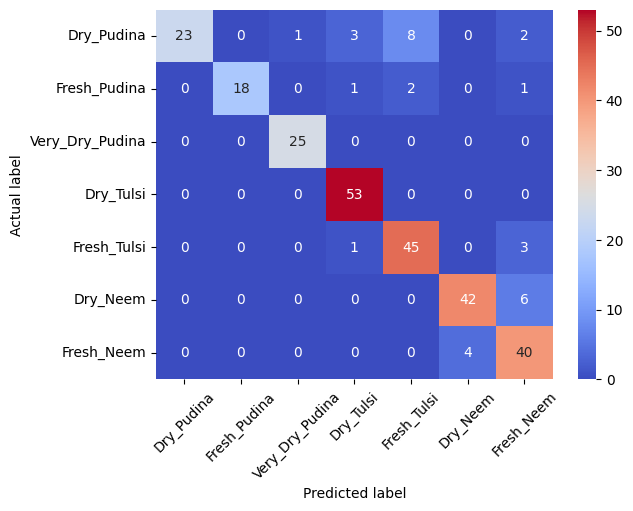

In [7]:
y_pred = final_model.predict(X_test_pca)
lb = ['Dry_Pudina', 'Fresh_Pudina', 'Very_Dry_Pudina', 'Dry_Tulsi', 'Fresh_Tulsi', 'Dry_Neem', 'Fresh_Neem']
confusion_mat = confusion_matrix(y_test,y_pred, labels=lb)
print("Confusion Matrix:")
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    xticklabels=lb,
    yticklabels=lb,
)
plt.xticks(rotation=45)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()